# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.


 Variables in order:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [1]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
df.shape

(506, 14)

In [67]:
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,shuffle=False)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#X_train

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [4]:

# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
X_test

(268, 13) (268,)
MAE: 3.167


array([[4.93200e-02, 3.30000e+01, 2.18000e+00, ..., 1.84000e+01,
        3.96900e+02, 7.53000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       ...,
       [1.20482e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.91550e+02, 1.41000e+01],
       [1.96500e-02, 8.00000e+01, 1.76000e+00, ..., 1.82000e+01,
        3.41600e+02, 1.29300e+01],
       [1.87000e-02, 8.50000e+01, 4.15000e+00, ..., 1.79000e+01,
        3.92430e+02, 6.36000e+00]])

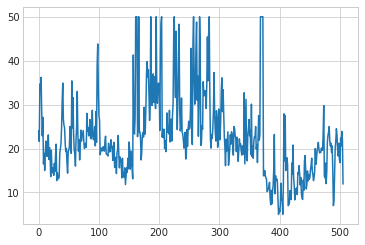

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()


ax.plot(df.index, y);

In [10]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [11]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [12]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()

model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(305, 13) (305,)
MAE: 3.181


In [ ]:
model = PloyRegression()

model.fit(X_train, y_train)

167

<Figure size 432x288 with 0 Axes>

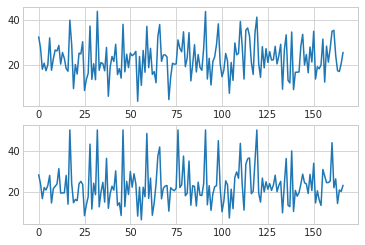

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
fig = plt.figure()
#ax = plt.axes()


xaxisyhat = list(range(len(yhat)))
xaxisyhat

#dftest=df
#dftest.index = df.iloc[:len(yhat)]
#df.index([1])
fig, ax = plt.subplots(2)


#plot yhat
ax[0].plot(xaxisyhat, yhat)

#plot ytest
ax[1].plot( list(range(len(y_test))), y_test)
#df.set_index(pd.Index[:4])

len(yhat)  
#yhat

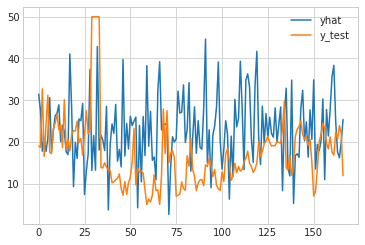

In [71]:

plt.plot(xaxisyhat, yhat, label = "yhat")
plt.plot(list(range(len(y_test))), y_test, label = "y_test")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [84]:
import numpy as np
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

r2 = metrics.r2_score(y_test, yhat)
print('R2 score is {}'.format(r2))

#mean_squared_error
msqe = mean_squared_error(y_test, yhat)
print('MsqE: %.3f' % msqe)



#Example on R_Square and Adjusted R Square

X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)
# 0.79180307318 0.790545085707



R2 score is -1.6624104409793907
MsqE: 176.029
0.7406426641094095 0.733789726372463


## correlation messen


In [53]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
# calculate Pearson's correlation
corr, _ = pearsonr(y_test, yhat)
print('Pearsons correlation: ',  corr)


Pearsons correlation:  0.8853090087568526


In [58]:

# calculate the spearmans's correlation between two variables

from scipy.stats import spearmanr
# seed random number generator

corrsp, _ = spearmanr(y_test, yhat)
print('spearmans correlation: ',  corrsp)

spearmans correlation:  0.8752153219794201


In [60]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(279, 13) (279,)
MAE: 3.241


In [13]:
#pip install statsmodels 

## -> neues beispiel: sensor signale mit r2 messung

RMSE:  3.3362527533373756
R2:  0.9841082585798676


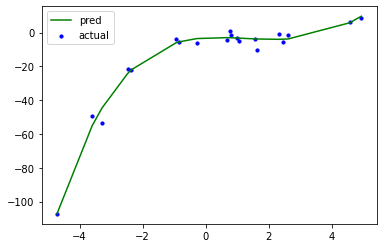

In [20]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE: ",rmse)
print("R2: ",r2)

plt.scatter(x, y, s=10, color="b",label="actual")
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='g',label="pred")
plt.legend()
plt.show()

## plot corellation ceof

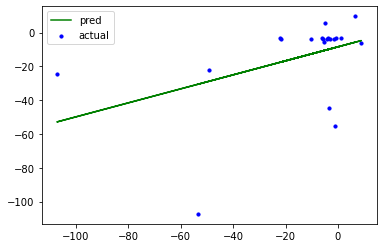

In [23]:
#plot corellation ceof
model = LinearRegression()
model.fit(y,y_poly_pred)
y_pred_lin = model.predict(y)

plt.scatter( y,y_poly_pred, s=10, color="b",label="actual")
plt.plot(y, y_pred_lin, color='g', label="pred")
plt.legend()
plt.show()

In [16]:
#correlation coeficient 
import numpy as np
R3 = np.corrcoef(y,y_poly_pred, rowvar=False)
R3

array([[1.        , 0.41770478],
       [0.41770478, 1.        ]])

RMSE:  10.120437473614723
R2:  0.9729191781210494


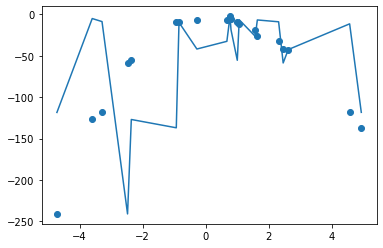

,x
0,-3.292157
1,0.799528
2,-0.936214
3,-4.722680
4,-3.602674
5,4.931834
6,-0.850265
7,2.454072
8,2.309657
9,0.768204


In [12]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 8 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]



polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
#score1=model.score(y,y_poly_pred)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
#print scores

print("RMSE: ",rmse)
print("R2: ",r2)

#print("score: ",score1)
xsort=sorted(x)
ysort=sorted(y)
plt.plot(xsort, y)

plt.scatter(x, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
#plt.plot(x, y_poly_pred, color='m')
plt.show()



## new example: data prep and append zeros signal to change it

In [7]:
#create append zeros
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#datazero = [[5, -240], [6, -240],[7, -240],[8, -240],[9, -240],[10, -240],[11, -240],[12, -240],[13, -240]] 
datazero = [[5, -240] ,[6, -240] ]
# Create the pandas DataFrame 
dfdatazero = pd.DataFrame(datazero, columns = ['x', 'y']) 
dfdatazero

,x,y
0,5,-240
1,6,-240


In [8]:

np.random.seed(0)
x4 = 2 - 3 * np.random.normal(0, 1, 20)
y4 = x4 - 8 * (x4 ** 2) + 0.5 * (x4 ** 3) + np.random.normal(-3, 3, 20)

dfx = pd.DataFrame(x4, columns =['x']) 
dfy = pd.DataFrame(y4, columns =['y']) 
#dfx.append(dfy, ignore_index=True)
datconcat = pd.concat([dfx, dfy], axis=1)

datconcat_sort=datconcat.sort_values(by=['x'], inplace=True)
datconcat_sortpd = pd.DataFrame(datconcat_sort) 
#len(datconcat)
#datconcat_sort
datconcat_sort_reset = datconcat_sortpd.reset_index()
datconcat_reseti=datconcat.reset_index()
datconcat_reseti

,index,x,y
0,3,-4.722680,-241.045416
1,4,-3.602674,-127.007509
2,0,-3.292157,-118.498200
3,16,-2.482237,-58.730532
4,11,-2.362821,-55.487419
5,2,-0.936214,-8.765172
6,6,-0.850265,-9.803948
7,12,-0.283113,-6.599041
8,14,0.668410,-6.800191
9,9,0.768204,-2.318151


In [9]:
datconcat_withzero = datconcat.append(dfdatazero)
datconcat_withzero

datconcat_withzero_reset=datconcat_withzero.reset_index()
datconcat_withzero_reset

,index,x,y
0,3,-4.722680,-241.045416
1,4,-3.602674,-127.007509
2,0,-3.292157,-118.498200
3,16,-2.482237,-58.730532
4,11,-2.362821,-55.487419
5,2,-0.936214,-8.765172
6,6,-0.850265,-9.803948
7,12,-0.283113,-6.599041
8,14,0.668410,-6.800191
9,9,0.768204,-2.318151


## sensor data with delay

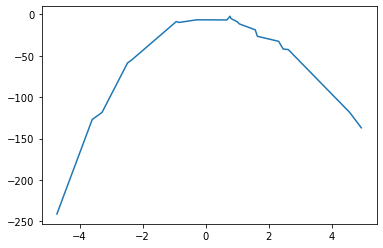

In [10]:
#original sesor data
plt.plot(datconcat["x"], datconcat["y"])




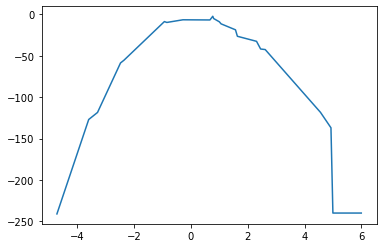

In [11]:
#original sesor data with zeros delay

plt.plot(datconcat_withzero_reset["x"], datconcat_withzero_reset["y"])

RMSE:  3.44989550740873
R2:  0.996853156458014


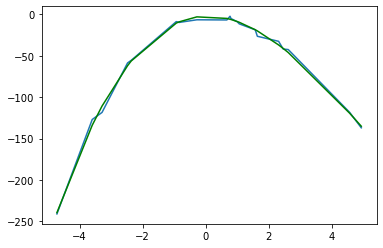

In [15]:
#model and plot


datconcatxx= pd.DataFrame(datconcat["x"])


#ploy with degree 3
polynomial_features= PolynomialFeatures(degree=3)
x_poly2 = polynomial_features.fit_transform(datconcat["x"].values.reshape(-1,1))

model = LinearRegression()
model.fit(x_poly2,datconcat["y"])
y_poly_pred2 = model.predict(x_poly2)
#score1=model.score(y,y_poly_pred)
rmse = np.sqrt(mean_squared_error(datconcat["y"],y_poly_pred2))
r2 = r2_score(datconcat["y"],y_poly_pred2)
#print scores

print("RMSE: ",rmse)
print("R2: ",r2)


plt.plot(datconcat["x"],datconcat["y"])
plt.plot(datconcat["x"],y_poly_pred2, color='g')

## save and load model

In [16]:

# Save Model Using Pickle
import pandas
from sklearn import model_selection

import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [21]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(x,y)
x_poly2 = polynomial_features.fit_transform(datconcat["x"].values.reshape(-1,1))
#x_poly2.
ypr=loaded_model.predict(x_poly2)
result=r2_score(datconcat["y"],ypr)

rmse2 = np.sqrt(mean_squared_error(datconcat["y"],ypr))

print("RMSE: ",rmse2)

print("r2 score with other values: ",result)
#x_poly2

RMSE:  3.44989550740873
r2 score with other values:  0.996853156458014


## test model: with new signal 

In [20]:
#test with new signal 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(x,y)
x_poly3 = polynomial_features.fit_transform(datconcat_withzero_reset["x"].values.reshape(-1,1))
#x_poly2.
ypr3=loaded_model.predict(x_poly3)
result3=r2_score(datconcat_withzero_reset["y"],ypr3)
rmse3 = np.sqrt(mean_squared_error(datconcat_withzero_reset["y"],ypr3))

print("RMSE: ",rmse3)
print("r2 score with other values: ",result3)
#x_poly2

RMSE:  25.28632539982217
r2 score with other values:  0.8985079434226971


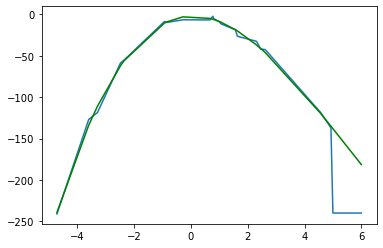

In [19]:
plt.plot(datconcat_withzero_reset["x"],datconcat_withzero_reset["y"])
plt.plot(datconcat_withzero_reset["x"],ypr3, color='g')